<a href="https://colab.research.google.com/github/pedroafleite/attrition/blob/main/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attrition Data Analysis

*Attrition* significa atrito, desgaste.  É um termo conhecido no inglês para se referir à perda natural de funcionários da empresa, seja por aposentadoria, demissão, condições de saúde, e outros motivos. Aqui, irei me referir a *Attrition* como Evasão.

Funcionários são muito importantes para qualquer empresa. A perda de funcionários pode acarretar em  diversos problemas. Perder funcionários experientes é um processo por si só caro, mas também pode afetar a produtividade e o lucro da empresa em geral.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignorar alertas do jupyter notebook

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descrição dos Dados

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/people_analytics/Dataset.xlsx")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.isna().sum() # dataset não possui valores nulos!

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


Variáveis com valores únicos determinados (**unique**  > 0) podem ser consideradas categóricas. No entanto, essas variáveis categóricas estão classificadas como `string` (`object` dtype). Seria melhor reclassificá-las com algorismos inteiros para modelarmos os dados.

In [7]:
categories = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
df_encoded = df.copy(deep=True)

In [8]:
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
for col in categories:
        df_encoded[col] = lab_enc.fit_transform(df[col])
        name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', name_mapping)

Feature Attrition
mapping {'No': 0, 'Yes': 1}
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
Feature Gender
mapping {'Female': 0, 'Male': 1}
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}
Feature MaritalStatus
mapping {'Divorced': 0, 'Married': 1, 'Single': 2}
Feature Over18
mapping {'Y': 0}
Feature OverTime
mapping {'No': 0, 'Yes': 1}


Assim, iremos nos referir a este dicionário **name_mapping** para nos referirmos aos significados dos algorismos da tabela.

Outras variáveis quantitativas representadas por poucos valores integrais também podem ser consideradas categóricas (**Education, EmployCount, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, NumCompaniesWorked, PerformanceRating, RelationshipSatisfaction, TrainingTimesLastYear, WorkLifeBalance**). 

## Análise Exploratória dos Dados

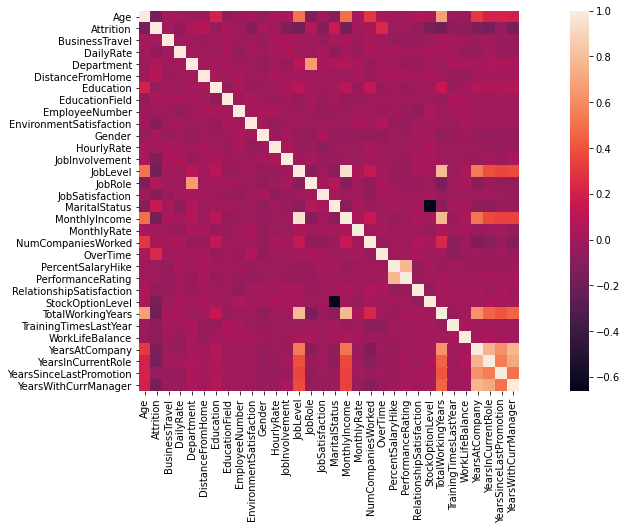

In [9]:
# correlation matrix (heatmap)
corrmat = df_encoded.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1).corr() # eliminar colunas irrelevantes para o heatmap
f, ax = plt.subplots(figsize=(18, 7))
sns.heatmap(corrmat, square=True, cbar=True);

Podemos entender várias correlações dos nossos dados através do heatmap acima:

- Evasão (**Attrition**) é altamente correlacionada com salário (**MonthlyIncome**), horas extras (**Overtime**), idade (**Age**), nível hierárquico do trabalho (**JobLevel**), status de relacionamento (**MaritalStatus**), anos no mercado de trabalho (**TotalWorkingYears**), anos no atual cargo (**YarsInCurrentRole**), e anos com atual gerente (**YearsWithCurrManager**), entre outros.
- Satisfação com o trabalho (**JobSatisfaction**) está relacionada a evasão (**Attrition**), mas também desconfortavelmente relacionada ao gênero (**Gender**).
- Salário (**MonthlyIncome**) é altamente correlacionado ao número total de anos do profissional no mercado de trabalho (**TotalWorkingYears**). 
- Salário (**MonthlyIncome**) também é correlacionado ao nível hierárquivo da profissão (**JobLevel**)
- Em menor grau, salário (**MonthlyIncome**) é correlacionado à idade do profissional (**Age**) e anos trabalhados na empresa (**YearsAtCompany**). 
- Ainda em menor escala, salário também é correlacionado com anos no papel atual (**YearsInCurrentRole**), anos desde a última promoção (**YearsSinceLastPromotion**), e anos com o atual gerente (**YearsWithCurrManager**).
- Estas últimas variáveis são bastante correlacionáveis entre si: anos trabalhados na empresa (**YearsAtCompany**), anos no papel atual (**YearsInCurrentRole**), anos desde a última promoção (**YearsSinceLastPromotion**), e anos com o atual gerente (**YearsWithCurrManager**).
- As quatro variáveis acima (**YearsAtCompany**, **YearsInCurrentRole**, **YearsSinceLastPromotion**, **YearsWithCurrManager**) também são correlacionadas em menor escala com salário (**MonthlyIncome**) e nível hierárquivo da profissão (**JobLevel**), e em menor escala ainda, com idade (**Age**).
- Algumas variáveis estão constantemente correlacionadas em menor grau entre si: educação (**Education**), anos do profissional no mercado de trabalho (**TotalWorkingYears**), número de empresas trabalhadas (**NumCompaniesWorked**), salário (**MonthlyIncome**), e nível hierárquivo da profissão (**JobLevel**).
- A opção de ações da empresa no salário (**StockOptionsLevel**) possui maior correlação com a taxa de salário/hora (**HourlyRate**) e o número de identificação funcionário (**EmployeeNumber**). 
- Satisfação com relacionamentos dentro da empresa (**RelationshipSatisfaction**) apresentam uma correlação inversa com as variáveis apresentadas acima (**EmployeeNumber** e **StockOptionsLevel**).
- Correlação entre escalada salarial (**PercentSalaryHike**) e performance(**PerformanceRating**)..
- Alta correlação entre departamento (**Deparment**) e papel profissional (**JobRole**).

Vamos explorar cada item para entender seus padrões de forma mais assertiva.

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
print(pd.DataFrame({'Percentage (%)': (df.groupby(('Attrition')).size()*100) / len(df)}))

           Percentage (%)
Attrition                
No              83.877551
Yes             16.122449


Isso requer atenção durante a modelagem porque os dados são *desbalanceados* com relação à evasão. Ao avaliarmos o modelo, seria útil balancear o modelo; ou seja, compararmos proporções semelhantes de Yes/No Attrition. Veremos as consequências deste desbalanço ao final deste notebook, na modelagem de dados.

### Idade

- Funcionários jovens entre 20-30 possuem grande chance de saírem.
- Evasão de funcionários diminui proporcionalmente com o aumento de idade na faixa dos 30-40 anos.
- Evasão volta a crescer proporcionalmente o aumento de idade após os 40 anos, talvez impulsionados pela aposentadoria de funcionários.

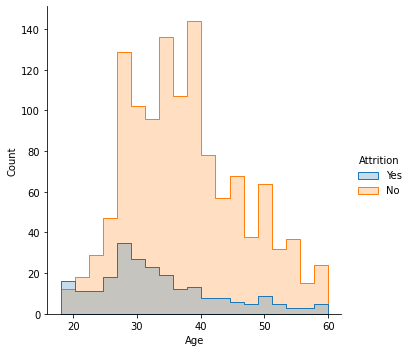

In [12]:
sns.displot(df, x="Age", hue="Attrition", element="step");

Para quantitativizar essa medida, vamos dividir a tabela em funcionários perdidos (**Attrition** == 1) e funcionários mantidos (**Attrition** == 0). Depois, mediremos a assimetria e curtose dos respectivos conjuntos. 

In [13]:
yes_attrition_df = df_encoded.loc[df_encoded['Attrition'] == 1]
no_attrition_df = df_encoded.loc[df_encoded['Attrition'] == 0]

In [14]:
print("Funcionários perdidos (por idade):")
print("Assimetria: %f" % yes_attrition_df['Age'].skew())
print("Curtose: %f" % yes_attrition_df['Age'].kurt())
print("======")
print("Funcionários mantidos (por idade):")
print("Assimetria: %f" % no_attrition_df['Age'].skew())
print("Curtose: %f" % no_attrition_df['Age'].kurt())

Funcionários perdidos (por idade):
Assimetria: 0.715732
Curtose: -0.057044
Funcionários mantidos (por idade):
Assimetria: 0.408122
Curtose: -0.411835


### Viagem a negócios

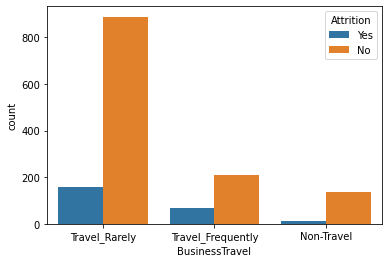

In [15]:
sns.countplot(x="BusinessTravel", hue="Attrition", data=df);

### Departamento

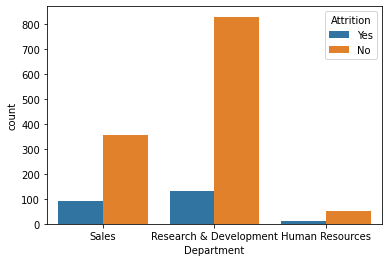

In [16]:
sns.countplot(x="Department", hue="Attrition", data=df);

### Distância de casa

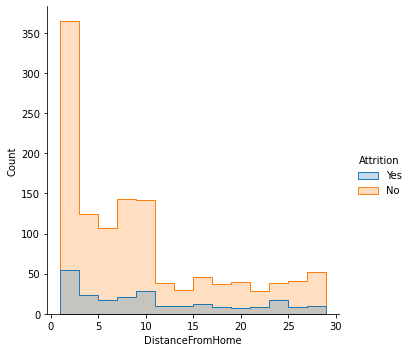

In [17]:
sns.displot(df, x="DistanceFromHome", hue="Attrition", element="step");

### Educação

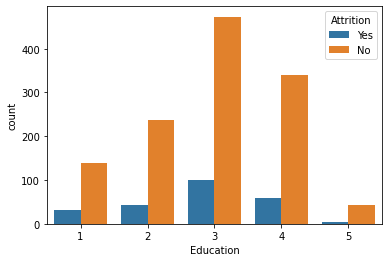

In [18]:
sns.countplot(x="Education", hue="Attrition", data=df);

### Número de identificação do funcionário

Existe um balanço entre a proporção de evasão e o número de identificação do funcionário.

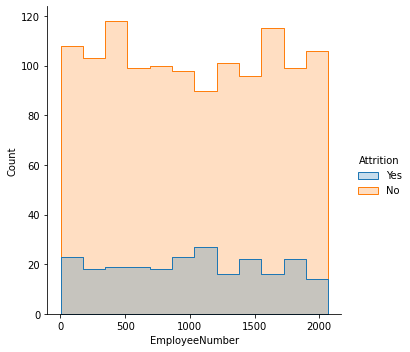

In [19]:
sns.displot(x="EmployeeNumber", hue="Attrition", data=df, element="step");

### Cargo

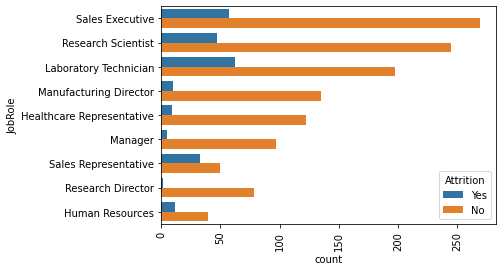

In [20]:
sns.countplot(y="JobRole", hue="Attrition", data=df)
plt.xticks(rotation=90);

### Salário e gênero

Diagrams tipo violino são interessantes para mostrar uma variável contínua (**MonthlyIncome**) vs. categórica (**Attrition**) vs. binária (**Gender**).

Ao compararmos as curvas de ambos os gêneros, observamos:

- Mulheres com salário acima de 750 tendem a evadir com menor frequência do que homens.

- Mulheres com salário acima de 1500 tendem a evadir com maior frequência do que homens.

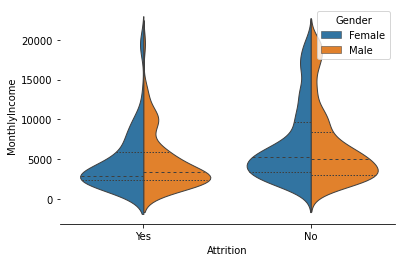

In [21]:
sns.violinplot(data=df, x="Attrition", y="MonthlyIncome", hue="Gender",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

### Escalada salarial

Ainda que a proporcionalidade da evasão aumente com a escalada salarial, isso não significa que uma maior escalada salarial seja ruim para o funcionário - muito pelo contrário. O que pode estar acontecendo é que o aumento da idade leva ao aumento da escalada salarial, e consequentemente, ao aumento da evasão por aposentadoria.

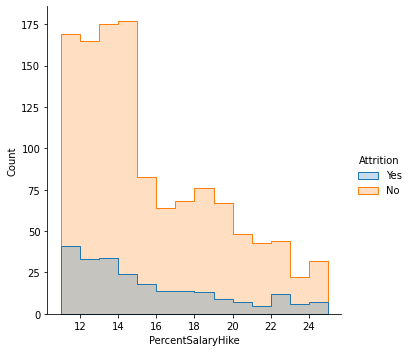

In [22]:
sns.displot(x="PercentSalaryHike", hue="Attrition", data=df, element="step");

## Nível hierárquico da profissão

Em termos gerais, a evasão diminui com o aumento do nível da profissão. 

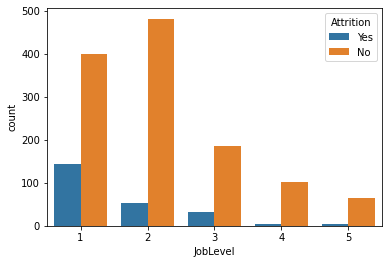

In [23]:
sns.countplot(x="JobLevel", hue="Attrition", data=df);

### Status de relacionamento

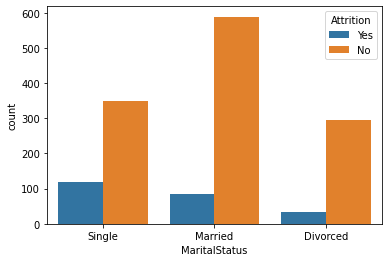

In [24]:
sns.countplot(x="MaritalStatus", hue="Attrition", data=df);

### Anos totais de trabalho

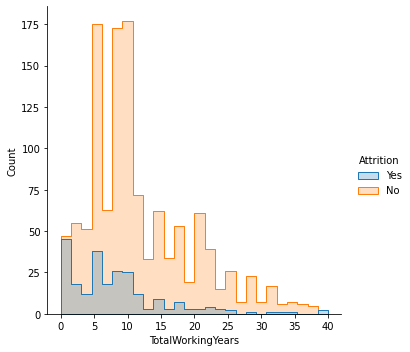

In [25]:
sns.displot(x="TotalWorkingYears", hue="Attrition", data=df, element="step");

### Nível de opções por ações

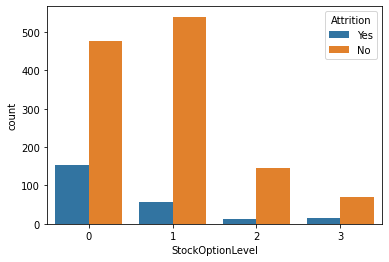

In [26]:
sns.countplot(x="StockOptionLevel", hue="Attrition", data=df);

### Nível de opções por ações e status de relacionamento

A opção de ações nº **0** é a única que aloca pessoas solteiras (**Single**). Isso pode ter sido ditado por algum regimento interno na empresa. Por isso, estas variáveis aparecem fortemente correlacionadas na matriz de correlação.

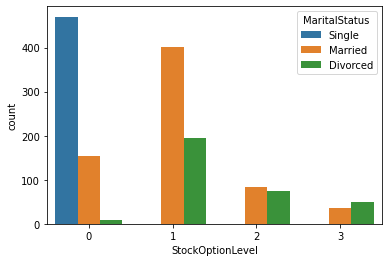

In [27]:
sns.countplot(x="StockOptionLevel", hue="MaritalStatus", data=df);

## Seleção de variáveis (*feature selection*)

Ainda que tenhamos analisado de formas bastante gerais quais variáveis são influenciadas pela evasão, devemos desvinciliar nosso modelo de suposições pessoais e provavelmente enviesadas sobre os dados.

É difícil hierarquizar qualitativamente estas variáveis por nível de influência sobre a evasão. Portanto, iremos definir quantitativamente estas variáveis. Neste caso, utilizaremos o teste qui-quadrado (χ2, *chi-squared test*).

In [28]:
target = df_encoded['Attrition'] # definir variável-alvo
features = df_encoded.drop(['Attrition'], axis=1) # definir variáveis
col_values = list(features.columns.values)


### chi-square test

In [29]:
from sklearn.feature_selection import chi2

feature_scores = chi2(features, target)[0]
for score, fname in sorted(zip(feature_scores, col_values), reverse=True)[:30]:
    print('chi-square', fname, score)

chi-square MonthlyIncome 127922.29369381821
chi-square MonthlyRate 1196.633552569816
chi-square DailyRate 956.5804943555729
chi-square Over18 nan
chi-square TotalWorkingYears 230.72161773754925
chi-square YearsAtCompany 142.10005430324915
chi-square YearsInCurrentRole 117.5225958913567
chi-square YearsWithCurrManager 110.6715338985734
chi-square Age 84.15527681001525
chi-square OverTime 63.84506671452294
chi-square DistanceFromHome 63.77214163101213
chi-square EmployeeNumber 58.120325954212234
chi-square StockOptionLevel 25.26882603175403
chi-square JobLevel 24.93924234571862
chi-square MaritalStatus 18.745657458341153
chi-square JobRole 9.004448467467538
chi-square YearsSinceLastPromotion 7.601723473243281
chi-square JobSatisfaction 7.011946634881222
chi-square EnvironmentSatisfaction 6.890594338387591
chi-square NumCompaniesWorked 6.438654443594589
chi-square JobInvolvement 4.60561606667209
chi-square TrainingTimesLastYear 3.0857961647837113
chi-square RelationshipSatisfaction 1.3323

## Dummy variables
Observando os resultados acima, vamos criar uma matriz esparsa com as variáveis categóricas. Consideraremos variáveis categóricas aquelas que não possuem valor ordinal. Ou seja, aquelas variáveis cujo significado numeral deve ser consultado e não pode ser deduzido apenas pelo seu valor. 

Exemplos: **'OverTime', 'StockOptionLevel', 'JobLevel', 'JobRole', 'MaritalStatus', 'JobSatisfaction', 'EnvironmentSatisfaction'**.

In [30]:
dfs = df_encoded[['MonthlyIncome', 'MonthlyRate', 'DailyRate', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
                  'Age', 'DistanceFromHome', 'EmployeeNumber', 'YearsSinceLastPromotion']] # tomar cuidado com o EmployeeNumber
cat = df_encoded[['OverTime', 'StockOptionLevel', 'JobLevel', 'JobRole', 'MaritalStatus', 'JobSatisfaction', 'EnvironmentSatisfaction',
                  'NumCompaniesWorked', 'JobInvolvement', 'TrainingTimesLastYear', 'RelationshipSatisfaction', 'Department', 'WorkLifeBalance']].astype('category')

In [31]:
cat = pd.get_dummies(cat)
cat.head()

,OverTime_0,OverTime_1,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,NumCompaniesWorked_0,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,Department_0,Department_1,Department_2,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [32]:
df_final = pd.concat([dfs, cat], axis=1)
df_final.head()

,MonthlyIncome,MonthlyRate,DailyRate,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Age,DistanceFromHome,EmployeeNumber,YearsSinceLastPromotion,OverTime_0,OverTime_1,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_0,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_0,MaritalStatus_1,MaritalStatus_2,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,NumCompaniesWorked_0,NumCompaniesWorked_1,NumCompaniesWorked_2,NumCompaniesWorked_3,NumCompaniesWorked_4,NumCompaniesWorked_5,NumCompaniesWorked_6,NumCompaniesWorked_7,NumCompaniesWorked_8,NumCompaniesWorked_9,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,TrainingTimesLastYear_0,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,Department_0,Department_1,Department_2,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,5993,19479,1102,8,6,4,5,41,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,5130,24907,279,10,10,7,7,49,8,2,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
2,2090,2396,1373,7,0,0,0,37,2,4,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,2909,23159,1392,8,8,7,0,33,3,5,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,3468,16632,591,6,2,2,2,27,2,7,2,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0


## Modelagem de dados

Como devemos descobrir quais pessoas possuem maior e menor probabilidade de sair de empresa, nós temos um problema de classificação binária (Yes/No Attrition). 

No nosso caso, em que as variáveis possuem proporções muito diferentes entre si, precisamos escalar as variáveis (*feature scaling*) para que os algoritmos de Machine Learning funcione bem. Para isso, usaremos `RobustScaler`.

Os algoritmos utilizados para modelar os dados serão:
- Logistic Regression
- Random Forest Classifier
- XGBoosting
- Ada Boost Classifier

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

model_log = make_pipeline(RobustScaler(), LogisticRegression())
model_rfc = make_pipeline(RobustScaler(), RandomForestClassifier())
model_xgb = make_pipeline(RobustScaler(), xgb.XGBClassifier(max_depth=2, n_estimators=3, learning_rate=1.0))
model_ada = make_pipeline(RobustScaler(), AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5))

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_final, target, test_size=0.2, random_state=42)

### Acurácia, Precisão e Revocação


$Accuracy = \frac{True Positive + True Negative}{True Positive + False Positive + True Negative + False Negative} = \frac{Total True Predictions}{Total Predictions} $

$Precision = \frac{True Positive}{True Positive + False Positive} = \frac{True Positive}{Total Predicted Positive} $

$Recall = \frac{True Positive}{True Positive + False Negative} = \frac{True Positive}{Total Actual Positive}$

$F1 = 2\times\frac{Precision\times Recall}{Precision + Recall}$

Acurácia é o número de amostras previstas corretamente dentre todas as amostras previstas.

Precisão indica o quão bem o modelo prevê a evasão de funcionários.

Recall indica o quão bem o modelo faz as escolhas certas. 

F1 score é uma função da precisão e do recall para definir uma acurácia mais realista.

In [35]:
def compare(model):
    clf=model
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)  

    acc.append(accuracy_score(pred,y_test))
    prec.append(precision_score(pred,y_test))
    rec.append(recall_score(pred,y_test))
    rocauc.append(roc_auc_score(pred,y_test))
    f1.append(f1_score(pred,y_test))

In [36]:
acc=[]
prec=[]
rec=[]
rocauc=[] 
f1=[]
models=[model_log, model_rfc, model_xgb, model_ada]
model_names=['Logistic Regression', 'Random Forest', 'XG Boost','Ada Boost']

for model in range(len(models)):
  compare(models[model])
    
x = {'Algorithm': model_names, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 score': f1 , 'ROC AUC': rocauc}
table_algo = pd.DataFrame(x)
table_algo

,Algorithm,Accuracy,Precision,Recall,F1 score,ROC AUC
0,Logistic Regression,0.867347,0.384615,0.500000,0.434783,0.704545
1,Random Forest,0.884354,0.128205,1.000000,0.227273,0.941176
2,XG Boost,0.846939,0.128205,0.312500,0.181818,0.595099
3,Ada Boost,0.853741,0.384615,0.441176,0.410959,0.674434


Obtivemos uma acurácia relativamente boa. No entanto, a precisão parece péssima (entre 12-38 %). Ou seja, ainda que o modelo preveja corretamente cerca de 84-88 % das amostras, nós não conseguimos isolar um indivíduo específico e dizer: "essa pessoa vai sair da empresa", pois nosso índice seria um tanto pior do que chutar. Isso acontece porque as pessoas que saem da empresa são relativamente raras (cerca de 16 % do total). Portanto, você pode acertar a maioria das vezes não porque o seu modelo é muito bom -- mas porque se você chutar que a pessoa "não vai evadir da empresa", você estará certo na maioria das vezes.

Esse é o problema dos dados estarem desbalanceados. Uma solução é a *reamostragem*. Ou seja, equivaler o tamanho dos conjuntos de Yes Attrition e No Attrition.

### Reamostragem

In [37]:
from sklearn.utils import resample

dff = pd.concat([df_final, target], axis=1)


# separate minority and majority classes
yes_attrition = dff.loc[dff['Attrition'] == 1]
no_attrition = dff.loc[dff['Attrition'] == 0]

no_attrition_downsampled = resample(no_attrition,
                                    replace = False, # sample without replacement
                                    n_samples = len(yes_attrition), # match minority n
                                    random_state = 42) # reproducible results
downsampled = pd.concat([yes_attrition, no_attrition_downsampled])
target_downsampled = downsampled['Attrition']
feature_downsampled = downsampled.drop(['Attrition'], axis=1)
downsampled['Attrition'].value_counts()

1    237
0    237
Name: Attrition, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(feature_downsampled, target_downsampled, test_size=0.2, random_state=42)

acc=[]
prec=[]
rec=[]
f1=[]
rocauc=[] 
models=[model_log, model_rfc, model_xgb, model_ada]
model_names=['Logistic Regression', 'Random Forest', 'XG Boost','Ada Boost']

for model in range(len(models)):
  compare(models[model])
    
x = {'Algorithm': model_names, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 score': f1, 'ROC AUC': rocauc}
table_algo = pd.DataFrame(x)
table_algo

,Algorithm,Accuracy,Precision,Recall,F1 score,ROC AUC
0,Logistic Regression,0.768421,0.808511,0.745098,0.775510,0.770276
1,Random Forest,0.736842,0.765957,0.720000,0.742268,0.737778
2,XG Boost,0.715789,0.638298,0.750000,0.689655,0.720455
3,Ada Boost,0.715789,0.723404,0.708333,0.715789,0.715869


Com isso, obtemos uma precisão de 63-80 %, um F1 de 68-77 % e concluímos nosso exercício. A partir daqui, poderíamos testar muitas outras técnicas para melhorar nossos resultados:

- Validação cruzada
- Paineis empilhados
- Métodos caixa branca
- Deep Learning: métodos envolvendo ANN